In [2]:
# First, we define the model.
model = Model(nz=200, Lz=100.0, κ=1);

# The diffusion equation in `OceanTurb.jl`

Here we demonstrate how to set up a `Model` in `OceanTurb.jl`, set initial conditions and boundary conditions, and iterate the model forward.

In [1]:
using Pkg; Pkg.activate(".."); Pkg.instantiate()

using OceanTurb.Diffusion, PyPlot, PyPlotPlus

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


┌ Info: Recompiling stale cache file /Users/gregorywagner/.julia/compiled/v1.0/OceanTurb/9iboO.ji for OceanTurb [d848d694-35fd-11e9-1c91-9995598ac29e]
└ @ Base loading.jl:1187


# No-flux boundary conditions (the default)

When a `Diffusion.Model` is initialized, it assumes
a default no-flux boundary condition for `c`.

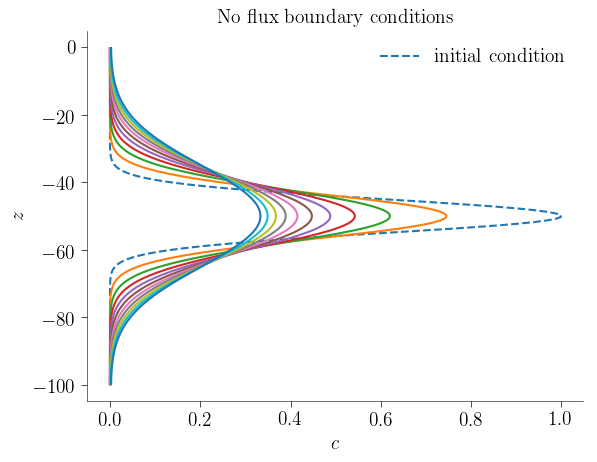

In [3]:
# Next we use a simple initial condition and iterate forward
z0, dz = -height(model)/2, height(model)/20
c0(z) = exp(-(z-z0)^2 / 2dz^2)

# Set c to the function c0(z) --- enabled by some OceanTurb.jl syntactic sugar
model.solution.c = c0

# Initialize plotting
ax, fig = subplots()
xlabel(L"c")
ylabel(L"z")
title("No flux boundary conditions")
cornerspines()

plot(model.solution.c.data, zdata(model.solution.c), "--", label="initial condition")

# Run
dt = 0.01
nt = 1000
ni = 10

for i = 1:ni
    iterate!(model, dt, nt)
    plot(model.solution.c.data, zdata(model.solution.c))
end

legend();

# Constant (in time) Dirichlet boundary conditions

A Dirichlet boundary condition is one where the field's *value* 
is set on the boundary, rather than it's gradient or flux.
In `OceanTurb.jl` the object that implements Dirichlet boundary 
conditions is called `ValueBC`.

Below we demonstrate how to set a constant `ValueBC`.

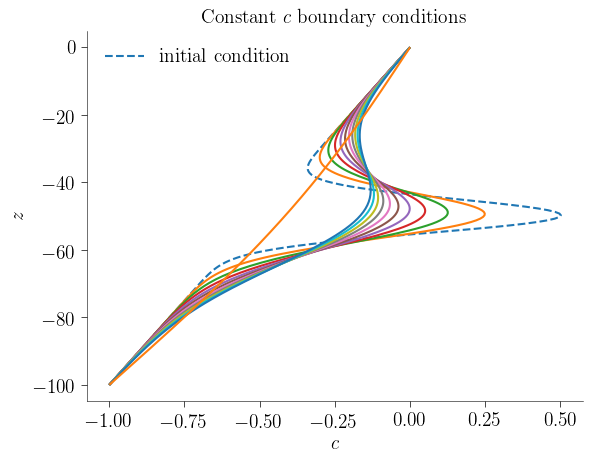

In [4]:
# Re-initialize the solution
c0(z) = exp(-(z-z0)^2 / 2dz^2) + z/height(model)
model.solution.c = c0

# Set constant boundary conditions at top and bottom
bottom_bc = ValueBC(Bottom, -1.0)
top_bc = ValueBC(Top, 0.0)

set_bcs!(model, c=(bottom_bc, top_bc))

# Initialize plotting
ax, fig = subplots()
xlabel(L"c")
ylabel(L"z")
title("Constant \$c\$ boundary conditions")
cornerspines()

plot(model.solution.c.data, zdata(model.solution.c), "--", label="initial condition")

# Run the model
dt = 0.01
nt = 1000
ni = 10

for i = 1:ni
    iterate!(model, dt, nt)
    plot(model.solution.c.data, zdata(model.solution.c))
end

iterate!(model, dt, 100nt)
plot(model.solution.c.data, zdata(model.solution.c))

legend();

# Constant flux boundary conditions

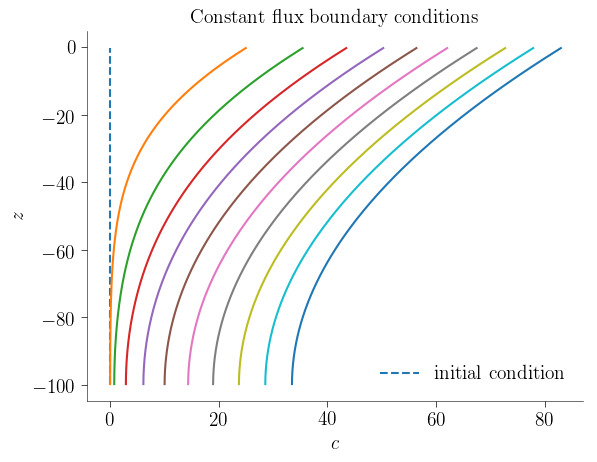

In [5]:
# Re-initialize the solution
model.solution.c = 0

# Set constant flux boundary conditions at top and bottom
top_bc = FluxBC(Top, -1.0) # Negative flux at the top implies increasing tracer in the interior.
bottom_bc = FluxBC(Bottom, 0.0)

set_bcs!(model, c=(bottom_bc, top_bc))

# Initialize plotting
ax, fig = subplots()
xlabel(L"c")
ylabel(L"z")
title("Constant flux boundary conditions")
cornerspines()

plot(model.solution.c.data, zdata(model.solution.c), "--", label="initial condition")

# Run the model
dt = 0.01
nt = 50000
ni = 10

for i = 1:ni
    iterate!(model, dt, nt)
    plot(model.solution.c.data, zdata(model.solution.c))
end

legend();

# Time-dependent boundary conditions

A function can also be used to set boundary conditions.

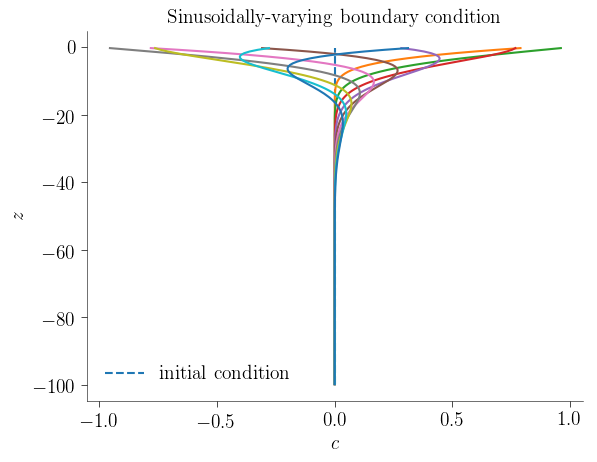

In [24]:
# Re-initialize the solution
model.solution.c = 0

T = 100 # time for diffusion to act over z=10
ω = 2π/T
sinusoidal_top(model) = sin(ω*model.clock.time)

# Set constant flux boundary conditions at top and bottom
top_bc = ValueBC(Top, sinusoidal_top)
bottom_bc = FluxBC(Bottom, 0.0)

set_bcs!(model, c=(bottom_bc, top_bc))

# Initialize plotting
ax, fig = subplots()
xlabel(L"c")
ylabel(L"z")
title("Sinusoidally-varying boundary condition")
cornerspines()

plot(model.solution.c.data, zdata(model.solution.c), "--", label="initial condition")

# Run the model
dt = 0.01
nt = 1000
ni = 10

for i = 1:ni
    iterate!(model, dt, nt)
    plot(model.solution.c.data, zdata(model.solution.c))
end

legend();